# Classification experiments

## Table of contents

1. [Support vector machines using LocalQueue](#Support-vector-machines-using-LocalQueue)
2. [Multilayer perceptons using SlurmQueue](#Multilayer-perceptrons-using-SlurmQueue)

In [250]:
%load_ext autoreload
%autoreload
import sys, os, time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
import seaborn as sns
sns.set_context('notebook')

sys.path.append('/mnt/c/Users/mtr22/Code/param_search')
sys.path.append('/ocean/projects/asc170022p/mtragoza/param_search')
import param_search as ps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Support vector machines using LocalQueue

Here we are evaluating support vector machines for classification using the Pima data set. First we will define a hyperparameter search space involving the type of SVM, type of kernel and regularization parameters. We break up the search space into a product over SVM types (`sklearn.svm.SVC` or `sklearn.svm.NuSVC`, which each have a different regularization parameter) and kernel types. We explore four different kernels: linear, 2nd-degree polynomial, 3rd-degree polynomila, and radial basis function.

In [214]:
# explore different amounts of regularization
#   for each of the two different SVM types

reg_space = ps.ParamSpace(
    type='SVC',
    C=[0.1, 0.5, 1.0, 5.0, 10.0],
    nu=0,
) + ps.ParamSpace(
    type='NuSVC',
    C=0,
    nu=[0.1, 0.2, 0.3, 0.4, 0.5]
)

# try four different SVM kernels

kernel_space = ps.ParamSpace(
    kernel=['linear', 'rbf'],
    degree=1
) + ps.ParamSpace(
    kernel='poly',
    degree=[2, 3]
)

svm_space = reg_space * kernel_space
len(svm_space)

40

We create a simple job template that just calls a python script that trains an SVM and saves its predictions to a file. We pass the hyperparameters into the job via command line arguments. Then we submit the jobs to the local queue and monitor the progress.

In [215]:
template = '''\
pwd
python ../hw5_SVM.py --name {job_name} --type {type} --C {C} --nu {nu} \
    --kernel {kernel} --degree {degree} -d ..
'''
name = 'svm__{type}__{C:}__{nu:.2f}__{kernel}__{degree}'

jobs = ps.submit(cmd, name, svm_space, work_dir='hw-5-files', use='local', n_proc=1)
jobs

100%|██████████| 40/40 [01:30<00:00,  2.25s/it]


,type,C,nu,kernel,degree,job_name,stdout,stderr,work_dir
0,SVC,0.1,0.0,linear,1,svm__SVC__0.1__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__linear__1
1,SVC,0.1,0.0,rbf,1,svm__SVC__0.1__0.00__rbf__1,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__rbf__1
2,SVC,0.1,0.0,poly,2,svm__SVC__0.1__0.00__poly__2,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__poly__2
3,SVC,0.1,0.0,poly,3,svm__SVC__0.1__0.00__poly__3,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__poly__3
4,SVC,0.5,0.0,linear,1,svm__SVC__0.5__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__0.5...,,hw-5-files/svm__SVC__0.5__0.00__linear__1
5,SVC,0.5,0.0,rbf,1,svm__SVC__0.5__0.00__rbf__1,Configuring run\n{\n 'name': 'svm__SVC__0.5...,,hw-5-files/svm__SVC__0.5__0.00__rbf__1
6,SVC,0.5,0.0,poly,2,svm__SVC__0.5__0.00__poly__2,Configuring run\n{\n 'name': 'svm__SVC__0.5...,,hw-5-files/svm__SVC__0.5__0.00__poly__2
7,SVC,0.5,0.0,poly,3,svm__SVC__0.5__0.00__poly__3,Configuring run\n{\n 'name': 'svm__SVC__0.5...,,hw-5-files/svm__SVC__0.5__0.00__poly__3
8,SVC,1.0,0.0,linear,1,svm__SVC__1.0__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__1.0...,,hw-5-files/svm__SVC__1.0__0.00__linear__1
9,SVC,1.0,0.0,rbf,1,svm__SVC__1.0__0.00__rbf__1,Configuring run\n{\n 'name': 'svm__SVC__1.0...,,hw-5-files/svm__SVC__1.0__0.00__rbf__1


We can check whether the jobs completed successfully by viewing their stderr, which is recorded in the job status data frame.

In [218]:
print(jobs.iloc[0].stderr)

We can view the stdout in the job status data frame, as well.

In [219]:
print(jobs.iloc[0].stdout)

Configuring run
{
    'name': 'svm__SVC__0.1__0.00__linear__1',
    'type': 'SVC',
    'kernel': 'linear',
    'degree': 1,
    'nu': 0.0,
    'C': 0.1,
    'data_dir': '..',
    'out_dir': '.'
}

Loading training set
   preg  plas  pres  skin  test  mass   pedi  age  class
0     5    44    62     0     0  25.0  0.587   36      0
1    10   129    76    28   122  35.9  0.280   39      0
2     4   148    60    27   318  30.9  0.150   29      1
3    13   153    88    37   140  40.6  1.174   39      0
4     1   128    48    45   194  40.5  0.613   24      1
(537, 8) (537,)

Loading test set
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6    92    62    32   126  32.0  0.085   46      0
1     5   132    80     0     0  26.8  0.186   69      0
2     3   106    72     0     0  25.8  0.207   27      0
3     4    99    68    38     0  32.8  0.145   33      0
4     4    96    56    17    49  20.8  0.340   26      0
(231, 8) (231,)

Standardizing input variables
Fitting support v

It seems that everything ran successfully, so now we read in the output metrics. In this case, our jobs just recorded the raw predictions and true classes for each data sample, so we will load these and then compute some classification metrics. Note that keyword arguments passed to `param_search.metrics` are passed to `pd.read_csv`, so this function has all of the flexibility in output formats that pandas allows.

In [220]:
%autoreload
metrics = ps.metrics(jobs, names=['data', 'y', 'yhat', 'score'])
metrics

,type,C,nu,kernel,degree,job_name,stdout,stderr,work_dir,data,y,yhat,score
0,SVC,0.1,0.0,linear,1,svm__SVC__0.1__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__linear__1,train,0.0,0.0,-2.451022
1,SVC,0.1,0.0,linear,1,svm__SVC__0.1__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__linear__1,train,0.0,1.0,0.274993
2,SVC,0.1,0.0,linear,1,svm__SVC__0.1__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__linear__1,train,1.0,0.0,-0.270203
3,SVC,0.1,0.0,linear,1,svm__SVC__0.1__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__linear__1,train,0.0,1.0,2.106484
4,SVC,0.1,0.0,linear,1,svm__SVC__0.1__0.00__linear__1,Configuring run\n{\n 'name': 'svm__SVC__0.1...,,hw-5-files/svm__SVC__0.1__0.00__linear__1,train,1.0,0.0,-0.191747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30715,NuSVC,0.0,0.5,poly,3,svm__NuSVC__0__0.50__poly__3,Configuring run\n{\n 'name': 'svm__NuSVC__0...,,hw-5-files/svm__NuSVC__0__0.50__poly__3,test,1.0,0.0,-0.028494
30716,NuSVC,0.0,0.5,poly,3,svm__NuSVC__0__0.50__poly__3,Configuring run\n{\n 'name': 'svm__NuSVC__0...,,hw-5-files/svm__NuSVC__0__0.50__poly__3,test,0.0,0.0,-0.949890
30717,NuSVC,0.0,0.5,poly,3,svm__NuSVC__0__0.50__poly__3,Configuring run\n{\n 'name': 'svm__NuSVC__0...,,hw-5-files/svm__NuSVC__0__0.50__poly__3,test,0.0,0.0,-1.368802
30718,NuSVC,0.0,0.5,poly,3,svm__NuSVC__0__0.50__poly__3,Configuring run\n{\n 'name': 'svm__NuSVC__0...,,hw-5-files/svm__NuSVC__0__0.50__poly__3,test,0.0,0.0,-1.131596


Now we will create an aggregated data frame that evaluates each SVM classifier in terms of accuracy, ROC AUC, and precision-recall AUC. We will also reformat some of our param columns to simplify the plotting.

In [225]:
def evaluate_classifier(x):
    ret = dict()
    ret['accuracy'] = accuracy_score(x['y'], x['yhat'])
    ret['roc_auc'] = roc_auc_score(x['y'], x['score'])
    ret['pr_auc'] = average_precision_score(x['y'], x['score'])
    return pd.Series(ret)

# aggregate rows
agg = metrics.groupby(svm_space.keys() + ['data']).apply(evaluate_classifier)
agg = agg.reset_index()

# aggregate columns
agg['kernel'] = agg['kernel'] + agg['degree'].astype(str).where(agg['degree'] > 1, '')
agg['C/nu'] = np.maximum(agg['C'], agg['nu'])
agg

,type,C,nu,kernel,degree,data,accuracy,roc_auc,pr_auc,C/nu
0,NuSVC,0.0,0.1,linear,1,test,0.354978,0.362500,0.259359,0.1
1,NuSVC,0.0,0.1,linear,1,train,0.387337,0.379755,0.332786,0.1
2,NuSVC,0.0,0.1,poly2,2,test,0.593074,0.500000,0.340853,0.1
3,NuSVC,0.0,0.1,poly2,2,train,0.538175,0.476291,0.372866,0.1
4,NuSVC,0.0,0.1,poly3,3,test,0.467532,0.383275,0.268030,0.1
...,...,...,...,...,...,...,...,...,...,...
75,SVC,10.0,0.0,poly2,2,train,0.731844,0.758958,0.671099,10.0
76,SVC,10.0,0.0,poly3,3,test,0.761905,0.778521,0.563251,10.0
77,SVC,10.0,0.0,poly3,3,train,0.841713,0.907838,0.881531,10.0
78,SVC,10.0,0.0,rbf,1,test,0.766234,0.830018,0.612913,10.0


We now have a data frame full of hyperparameter values and the associated evaluation metrics which we can plot quite easily with `param_search.plot` to visualize how the SVM's test performance changes with each parameter.

Text(0.5, 57.5, 'nu')

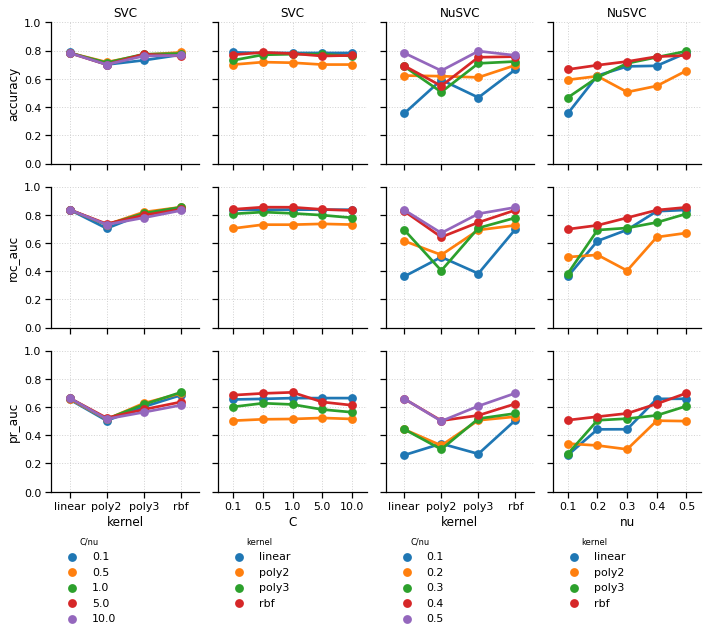

In [226]:
%autoreload

y = ['accuracy', 'roc_auc', 'pr_auc']
ylim = {
    'accuracy': [0.0, 1.0],
    'roc_auc':  [0.0, 1.0],
    'pr_auc':   [0.0, 1.0]
}
x = ['kernel', 'C/nu']

fig = ps.plot(
    agg[agg['data'] == 'test'],
    x=x, y=y, block='type',
    block_levels=['SVC', 'NuSVC'],
    ylim=ylim,
    width=2.5
)
fig.axes[9].set_xlabel('C')
fig.axes[11].set_xlabel('nu')

At the end of the day, we typically want to select the best model according some criteria. We can show the top five of the models we evaluated ranked by their precision-recall AUC on the test set.

In [228]:
agg[agg['data'] == 'test'].sort_values('pr_auc', ascending=False).head(5)

,type,C,nu,kernel,degree,data,accuracy,roc_auc,pr_auc,C/nu
62,SVC,1.0,0.0,rbf,1,test,0.779221,0.852993,0.704094,1.0
38,NuSVC,0.0,0.5,rbf,1,test,0.766234,0.852377,0.698484,0.5
54,SVC,0.5,0.0,rbf,1,test,0.787879,0.853521,0.696794,0.5
46,SVC,0.1,0.0,rbf,1,test,0.770563,0.838468,0.684321,0.1
64,SVC,5.0,0.0,linear,1,test,0.783550,0.835651,0.663428,5.0


## Multilayer perceptrons using SlurmQueue

Now we will run a similar experiment using multilayer perceptons. These take longer to train and have many more hyperparameters, so we need to scale the experiment up to run on a Slurm cluster. This is easy enough using `param_search`.

In [229]:
mlp_space = ps.ParamSpace(
    hidden_layers=['4', '8', '16', '4-4', '8-8', '4-4-4', '8-8-8', '16-8-4'],
    activation=['l', 't', 'r'],
    alpha=[1e-3, 1e-4, 1e-5],
    lr_func=['a'],
    lr_init=[1e-2, 1e-3, 1e-4],
    max_iter=[1000],
    batch_size=[32, 64, 128],
    random_seed=range(3),
)
len(mlp_space)

1944

In [260]:
%autoreload
name = 'mlp__{hidden_layers}__{activation}__{alpha:.0e}__{lr_func}__{lr_init:.0e}__{max_iter}__{batch_size}__{random_seed}'

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH -A asc170022p
#SBATCH --partition=RM-shared
#SBATCH --dependency=singleton
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
{job_params}
hostname
pwd
source activate ISSP2170
python ../hw5_MLP.py --name {job_name} -H {hidden_layers} -A {activation} -a {alpha:.0e} -l {lr_func} -i {lr_init:.0e} -m {max_iter} -b {batch_size} -d ..
'''

jobs = ps.submit(template, name, mlp_space, work_dir='hw-5-files', use='slurm')

100%|██████████| 1944/1944 [00:52<00:00, 37.31it/s]


In [272]:
%autoreload
state_order = ['PENDING', 'RUNNING', 'COMPLETING', 'DONE']
jobs.status().fillna('DONE').groupby('job_state')[['job_id']].count() / len(mlp_space) * 100

,job_id
job_state,
DONE,100.0


In [273]:
print(jobs.iloc[0].stdout)

r042.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/ISSP2170/assignment-5/hw-5-files/mlp__8-8__l__1e-05__a__1e-03__1000__64__2
Configuring run
{
    'name': 'mlp__8-8__l__1e-05__a__1e-03__1000__64__2',
    'hidden_layers': (8,
    8),
    'activation': 'logistic',
    'solver': 'adam',
    'alpha': 1e-05,
    'learning_rate': 'adaptive',
    'learning_rate_init': 0.001,
    'max_iter': 1000,
    'batch_size': 64,
    'random_state': None,
    'verbose': True,
    'data_dir': '..',
    'out_dir': '.'
}

Loading training set
   preg  plas  pres  skin  test  mass   pedi  age  class
0     5    44    62     0     0  25.0  0.587   36      0
1    10   129    76    28   122  35.9  0.280   39      0
2     4   148    60    27   318  30.9  0.150   29      1
3    13   153    88    37   140  40.6  1.174   39      0
4     1   128    48    45   194  40.5  0.613   24      1
(537, 8) (537,)

Loading test set
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6    92    62    32   1

In [274]:
metrics = ps.metrics(jobs, names=['data', 'y', 'yhat', 'score'])
metrics

,hidden_layers,activation,alpha,lr_func,lr_init,max_iter,batch_size,random_seed,job_name,job_id,...,node_id,runtime,work_dir,array_idx,stdout,stderr,data,y,yhat,score
0,4,l,0.00100,a,0.0100,1000,32,0,mlp__8-8__l__1e-05__a__1e-03__1000__64__2,6865129.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r042.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,train,0.0,0.0,0.080427
1,4,l,0.00100,a,0.0100,1000,32,0,mlp__8-8__l__1e-05__a__1e-03__1000__64__2,6865129.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r042.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,train,0.0,1.0,0.677923
2,4,l,0.00100,a,0.0100,1000,32,0,mlp__8-8__l__1e-05__a__1e-03__1000__64__2,6865129.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r042.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,train,1.0,0.0,0.382706
3,4,l,0.00100,a,0.0100,1000,32,0,mlp__8-8__l__1e-05__a__1e-03__1000__64__2,6865129.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r042.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,train,0.0,1.0,0.848072
4,4,l,0.00100,a,0.0100,1000,32,0,mlp__8-8__l__1e-05__a__1e-03__1000__64__2,6865129.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r042.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,train,1.0,1.0,0.532553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864699,16-8-4,r,0.00001,a,0.0001,1000,128,2,mlp__16-8-4__r__1e-05__a__1e-04__1000__128__2,6866032.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,test,1.0,1.0,0.637166
1864700,16-8-4,r,0.00001,a,0.0001,1000,128,2,mlp__16-8-4__r__1e-05__a__1e-04__1000__128__2,6866032.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,test,0.0,0.0,0.360169
1864701,16-8-4,r,0.00001,a,0.0001,1000,128,2,mlp__16-8-4__r__1e-05__a__1e-04__1000__128__2,6866032.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,test,0.0,0.0,0.026887
1864702,16-8-4,r,0.00001,a,0.0001,1000,128,2,mlp__16-8-4__r__1e-05__a__1e-04__1000__128__2,6866032.0,...,NaN,NaN,/ocean/projects/asc170022p/mtragoza/ISSP2170/a...,NaN,r029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,,test,0.0,0.0,0.068426


In [267]:
# aggregate rows
agg = metrics.groupby(list(mlp_space.keys()) + ['data']).apply(evaluate_classifier)
agg = agg.reset_index()

# aggregate columns

# abbreviate columns
agg

,hidden_layers,activation,alpha,lr_func,lr_init,max_iter,batch_size,random_seed,data,accuracy,roc_auc,pr_auc
0,16,l,0.00001,a,0.0001,1000,32,0,test,0.753247,0.832394,0.636285
1,16,l,0.00001,a,0.0001,1000,32,0,train,0.767225,0.840564,0.749545
2,16,l,0.00001,a,0.0001,1000,32,1,test,0.766234,0.832482,0.641452
3,16,l,0.00001,a,0.0001,1000,32,1,train,0.767225,0.840430,0.748280
4,16,l,0.00001,a,0.0001,1000,32,2,test,0.766234,0.830194,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...
3883,8-8-8,t,0.00100,a,0.0100,1000,128,0,train,0.931099,0.985085,0.976873
3884,8-8-8,t,0.00100,a,0.0100,1000,128,1,test,0.722944,0.710123,0.500568
3885,8-8-8,t,0.00100,a,0.0100,1000,128,1,train,0.959032,0.984861,0.977286
3886,8-8-8,t,0.00100,a,0.0100,1000,128,2,test,0.632035,0.728697,0.506134


/ocean/projects/asc170022p/mtragoza/param_search/param_search/results.py:193: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


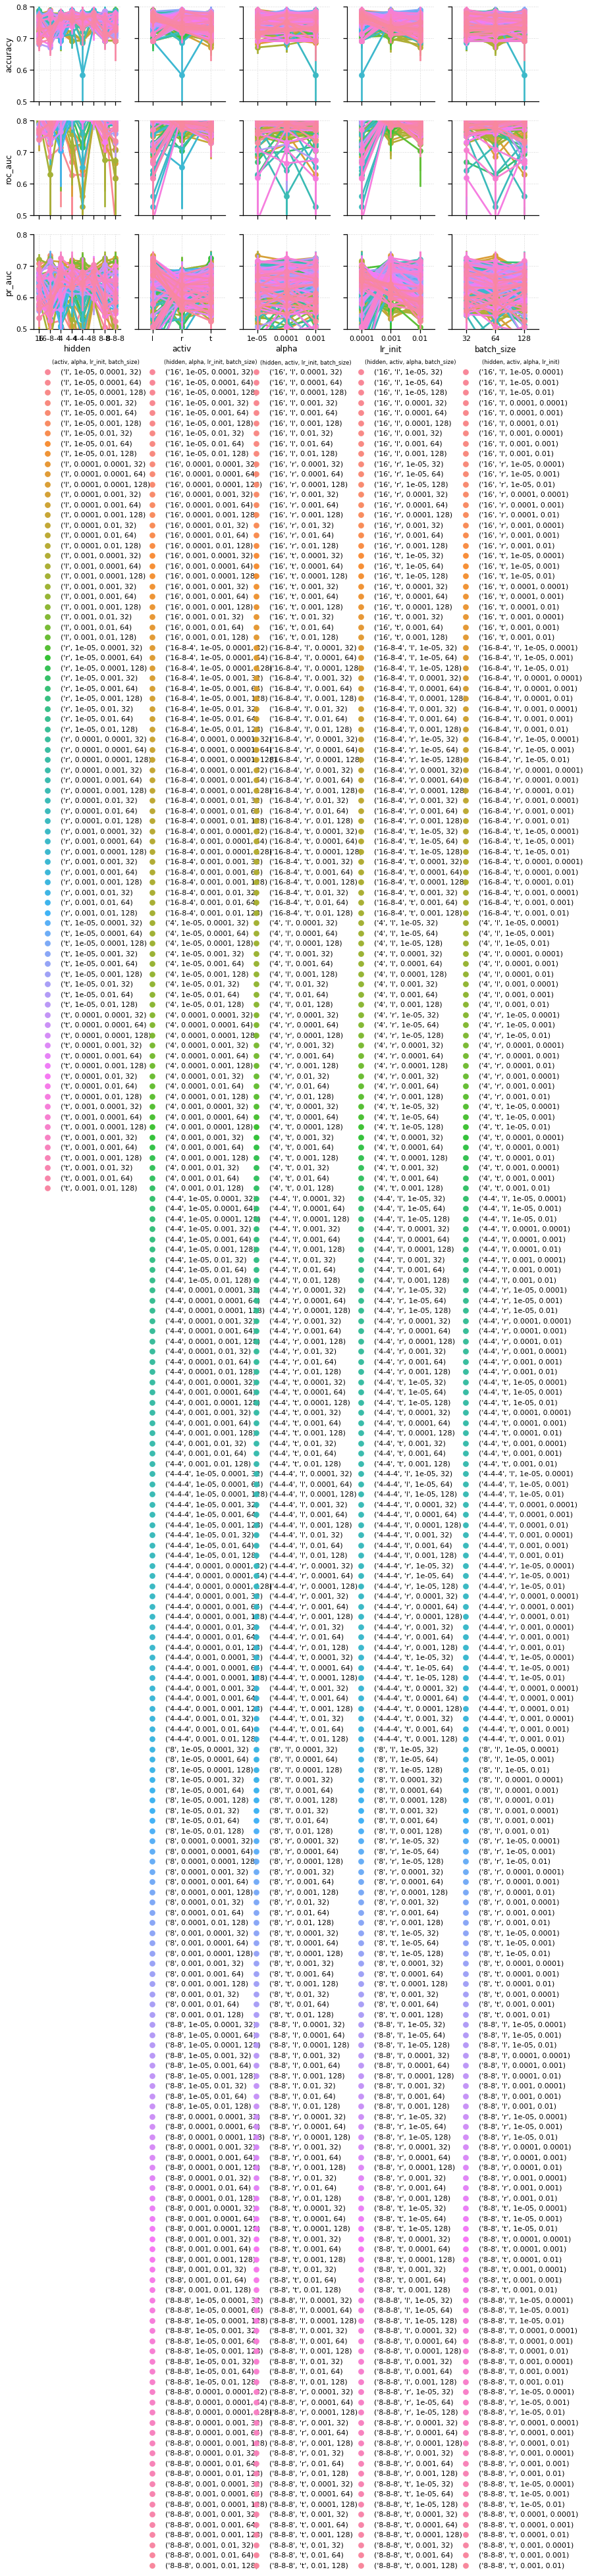

In [268]:
import matplotlib.pyplot as plt

y = ['accuracy', 'roc_auc', 'pr_auc']
ylim = {
    'accuracy': [0.5, 0.8],
    'roc_auc':  [0.5, 0.8],
    'pr_auc':   [0.5, 0.8]
}

agg['hidden'] = agg['hidden_layers']
agg['activ'] = agg['activation']

x = ['hidden', 'activ', 'alpha', 'lr_init', 'batch_size']

plt.rcParams['legend.title_fontsize'] = 'x-small'

fig = ps.plot(
    agg[
        (agg['data'] == 'test') &
        (agg['data'])
    ].copy(),
    x=x, y=y, ylim=ylim, hue=True,
    width=2.75
)

In [280]:
mlp_params = [p for p in mlp_space.keys() if p != 'random_seed']
agg[agg['data'] == 'test'].groupby(mlp_params).mean().sort_values('pr_auc', ascending=False).head(5)

random_seed  \
hidden_layers activation alpha   lr_func lr_init max_iter batch_size                
16-8-4        l          0.00001 a       0.001   1000     64                  1.0   
                         0.00100 a       0.001   1000     64                  1.0   
8-8-8         l          0.00010 a       0.001   1000     32                  1.0   
8-8           l          0.00100 a       0.001   1000     32                  1.0   
4             t          0.00100 a       0.001   1000     32                  1.0   

                                                                      accuracy  \
hidden_layers activation alpha   lr_func lr_init max_iter batch_size             
16-8-4        l          0.00001 a       0.001   1000     64          0.790765   
                         0.00100 a       0.001   1000     64          0.783550   
8-8-8         l          0.00010 a       0.001   1000     32          0.782107   
8-8           l          0.00100 a       0.001   1000     32          0.774892   
4             t          0.00100 a       0.001   1000     32          0.774892   

                                                                       roc_auc  \
hidden_layers activation alpha   lr_func lr_init max_iter batch_size             
16-8-4        l          0.00001 a       0.001   1000     64          0.860710   
                         0.00100 a       0.001   1000     64          0.862119   
8-8-8         l          0.00010 a       0.001   1000     32          0.857952   
8-8           l          0.00100 a       0.001   1000     32          0.856573   
4             t          0.00100 a       0.001   1000     32          0.856573   

                                                                        pr_auc  
hidden_layers activation alpha   lr_func lr_init max_iter batch_size            
16-8-4        l          0.00001 a       0.001   1000     64          0.731526  
                         0.00100 a       0.001   1000     64          0.725106  
8-8-8         l          0.00010 a       0.001   1000     32          0.724407  
8-8           l          0.00100 a       0.001   1000     32          0.723903  
4             t          0.00100 a       0.001   1000     32          0.723903